## Loading Library

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.filterwarnings(
    "ignore",
    category=DeprecationWarning,
    module="jupyter_client.session"
)


!pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/bread%20basket%20(1).csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [2]:
#1

df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/bread%20basket%20(1).csv')
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [4]:
df.isnull().sum()

,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a there is no null. (fill that blank on the section below)

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

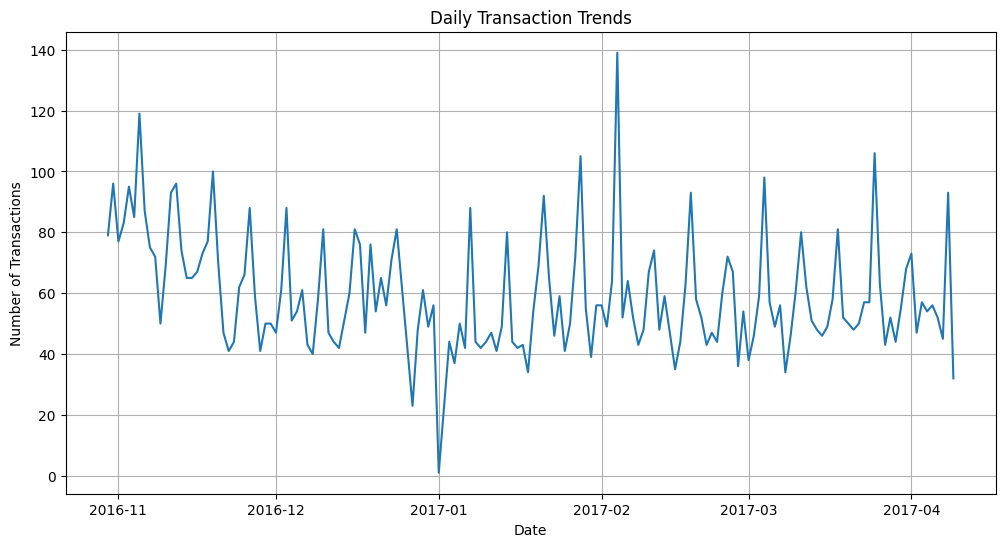

In [5]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

# Extract date and hour
df['date'] = df['date_time'].dt.date
df['hour'] = df['date_time'].dt.hour

# Group by date and count transactions
transactions_per_day = df.groupby('date')['Transaction'].nunique()

# Plot daily transaction trends
plt.figure(figsize=(12, 6))
transactions_per_day.plot(kind='line')
plt.title('Daily Transaction Trends')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [6]:
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['time'] = df['date_time'].dt.time
df['hour'] = df['date_time'].dt.hour
df['day_name'] = df['date_time'].dt.day_name()
df.sample(5)

,Transaction,Item,date_time,period_day,weekday_weekend,date,hour,day,month,year,time,day_name
2430,1177,Bread,2016-11-12 14:48:00,afternoon,weekend,2016-11-12,14,12,11,2016,14:48:00,Saturday
4326,2141,Muffin,2016-11-26 14:25:00,afternoon,weekend,2016-11-26,14,26,11,2016,14:25:00,Saturday
7969,3997,Coffee,2016-12-30 12:05:00,afternoon,weekday,2016-12-30,12,30,12,2016,12:05:00,Friday
5253,2606,Coffee,2016-12-04 13:18:00,afternoon,weekend,2016-12-04,13,4,12,2016,13:18:00,Sunday
4256,2103,Coffee,2016-11-26 11:02:00,morning,weekend,2016-11-26,11,26,11,2016,11:02:00,Saturday



Alright, now I can easily create a visualization of monthly sales.

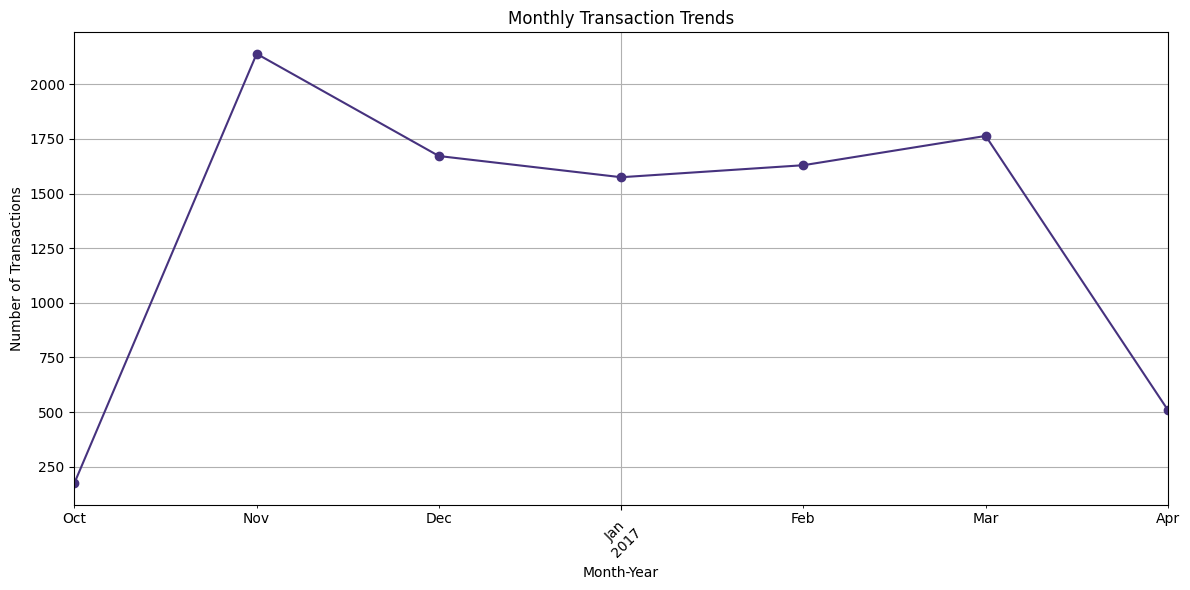

In [24]:
# Group by year-month and count unique transactions
transactions_per_month_year = df.groupby(df['date_time'].dt.to_period('M'))['Transaction'].nunique()

# Plot monthly transaction trends
plt.figure(figsize=(12, 6))
transactions_per_month_year.plot(kind='line', marker='o') # Changed to line plot and added markers
plt.title('Monthly Transaction Trends')
plt.xlabel('Month-Year') # Updated x-axis label
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

8. Now, the visualization above provides better insights: it clearly shows monthly transaction trends, highlighting a peak in November, a general stabilization from December to March, and a sharp decline in April.. (fill that blank on the section below)

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [8]:
print(f"Unique weekday names: {df[df['weekday_weekend'] == 'weekday']['day_name'].unique()}")
print(f"Unique weekend names: {df[df['weekday_weekend'] == 'weekend']['day_name'].unique()}")

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [9]:
monthly_daily_transactions = df.groupby(['month', 'day_name'])['Transaction'].nunique().unstack()
print(monthly_daily_transactions)

day_name  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
month                                                                   
1          232.0   169.0     365.0   209.0     195.0    246.0      159.0
2          254.0   211.0     378.0   225.0     185.0    196.0      181.0
3          303.0   193.0     365.0   234.0     253.0    204.0      212.0
4           45.0    57.0     166.0    79.0      52.0     54.0       56.0
10           NaN    96.0       NaN    79.0       NaN      NaN        NaN
11         321.0   228.0     403.0   290.0     299.0    305.0      294.0
12         320.0   174.0     382.0   145.0     264.0    180.0      207.0


11. Wow, it turns out the insight that can be gained from the table above is that transaction volumes are consistently highest on Saturdays across most months, while mid-week days (especially Wednesday and Monday) tend to have lower activity, indicating a strong weekend effect in customer behavior.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

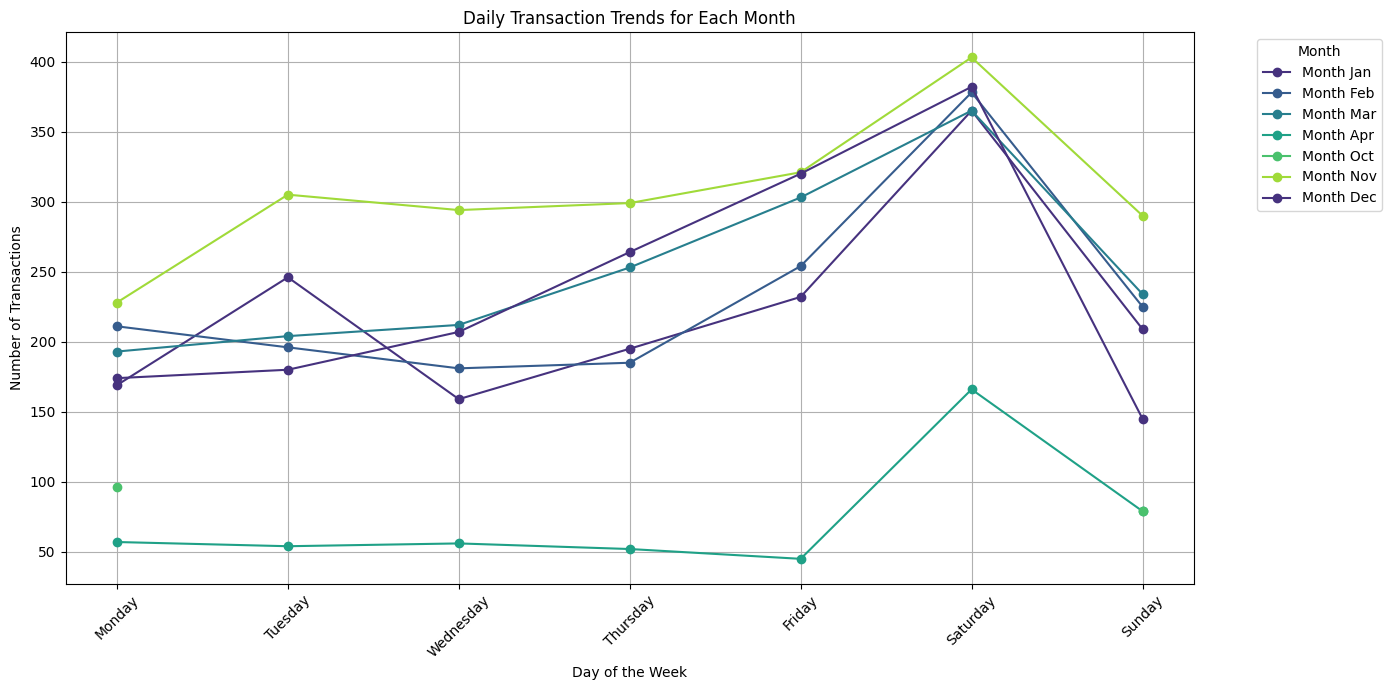

In [25]:
# Reorder day names for better visualization (already done)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
monthly_daily_transactions_ordered = monthly_daily_transactions[day_order]

# Plot line chart for daily transaction trends for each month
plt.figure(figsize=(14, 7))

for month_num, row in monthly_daily_transactions_ordered.iterrows():
    # Convert month number to month name for legend
    # Handle case where month_num might be float due to .unstack() followed by fillna
    month_name = pd.to_datetime(str(int(month_num)), format='%m').strftime('%b')
    plt.plot(row.index, row.values, marker='o', label=f'Month {month_name}')

plt.title('Daily Transaction Trends for Each Month')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that transactions consistently peak on Saturdays across most months, remain moderate on weekdays, and drop on Sundays, while November shows the strongest overall activity compared to other months..

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [13]:
df['period_day'].unique()

array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [14]:
print(f"Unique morning_hour: {df[df['period_day'] == 'morning']['hour'].unique()}")
print(f"Unique afternoon_hour: {df[df['period_day'] == 'afternoon']['hour'].unique()}")
print(f"Unique evening_hour: {df[df['period_day'] == 'evening']['hour'].unique()}")
print(f"Unique night_hour: {df[df['period_day'] == 'night']['hour'].unique()}")

Unique morning_hour: [ 9 10 11  8  7  1]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

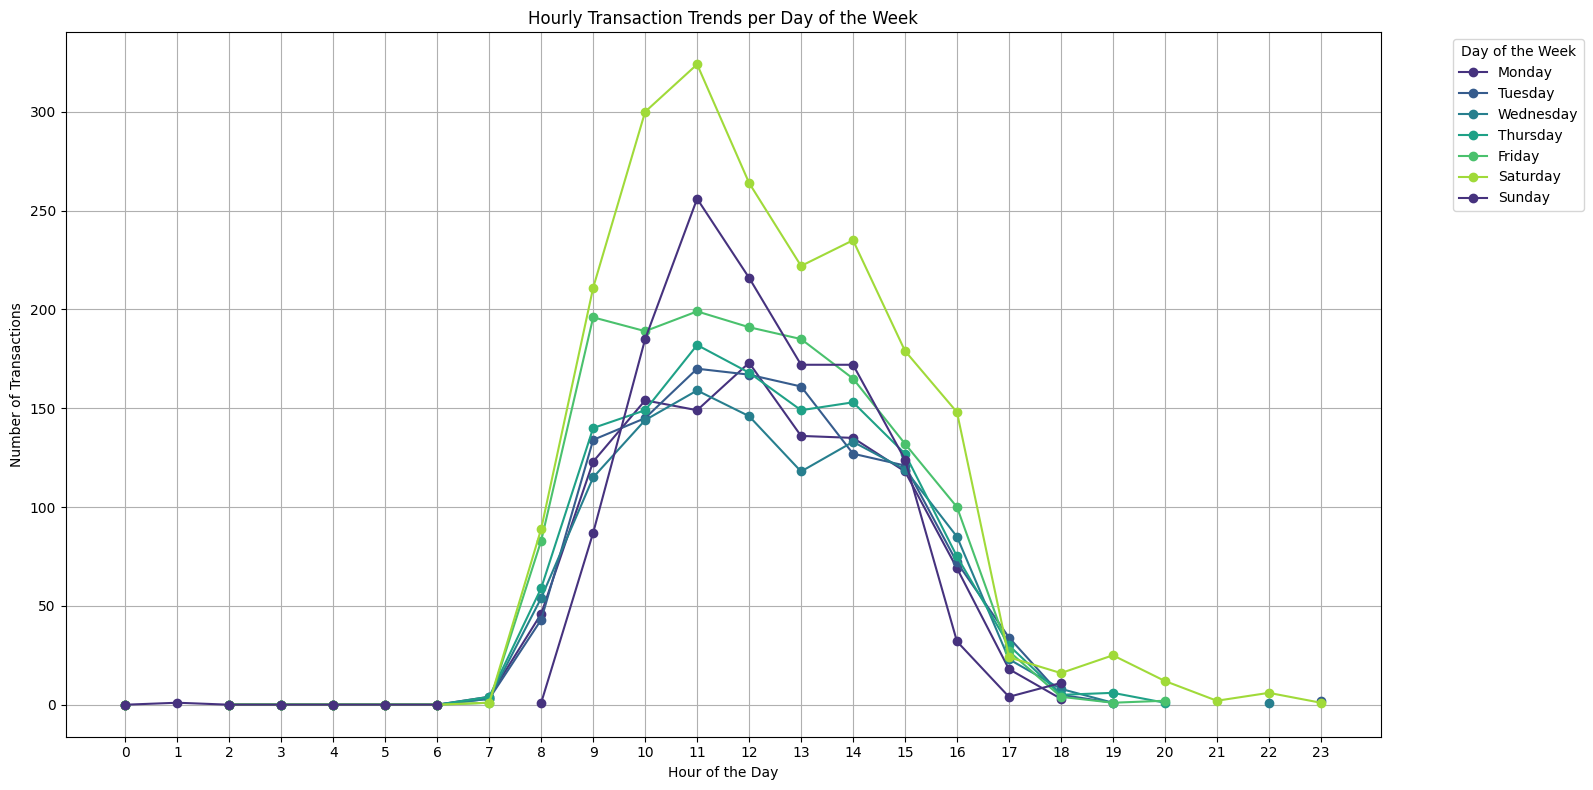

In [28]:
# Group by day of the week and hour, then count unique transactions
daily_hourly_transactions = df.groupby(['day_name', 'hour'])['Transaction'].nunique().unstack(level='day_name')

# Define the desired order for days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_hourly_transactions = daily_hourly_transactions.reindex(columns=day_order)

# Reindex the hours from 0 to 23 and fill any missing values with 0
all_hours = pd.Series(range(24)) # Assuming 'all_hours' is defined for 0-23
daily_hourly_transactions = daily_hourly_transactions.reindex(index=all_hours, fill_value=0)

# Plotting the sales comparison per hour for each day
plt.figure(figsize=(16, 8))
for day in day_order:
    plt.plot(daily_hourly_transactions.index, daily_hourly_transactions[day], marker='o', label=day)

plt.title('Hourly Transaction Trends per Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(all_hours, rotation=0)
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

18. The daily sales trend plot reveals that transactions peak around late morning to midday (approximately 10 AM–12 PM) for all days, especially on Saturdays, and then steadily decline toward the evening, with very low activity at night and early morning hours.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/tmp/ipython-input-4066722074.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.index, y=item_counts.values, palette='viridis')


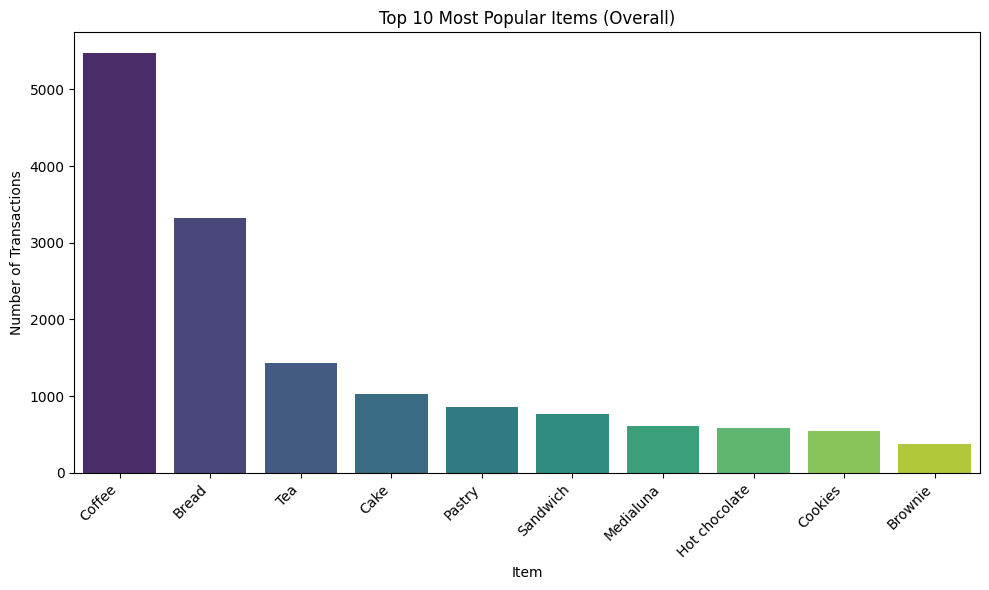

In [30]:
# Count the frequency of each item
item_counts = df['Item'].value_counts().head(10)

# Plot the top 10 most popular items
plt.figure(figsize=(10, 6))
sns.barplot(x=item_counts.index, y=item_counts.values, palette='viridis')
plt.title('Top 10 Most Popular Items (Overall)')
plt.xlabel('Item')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

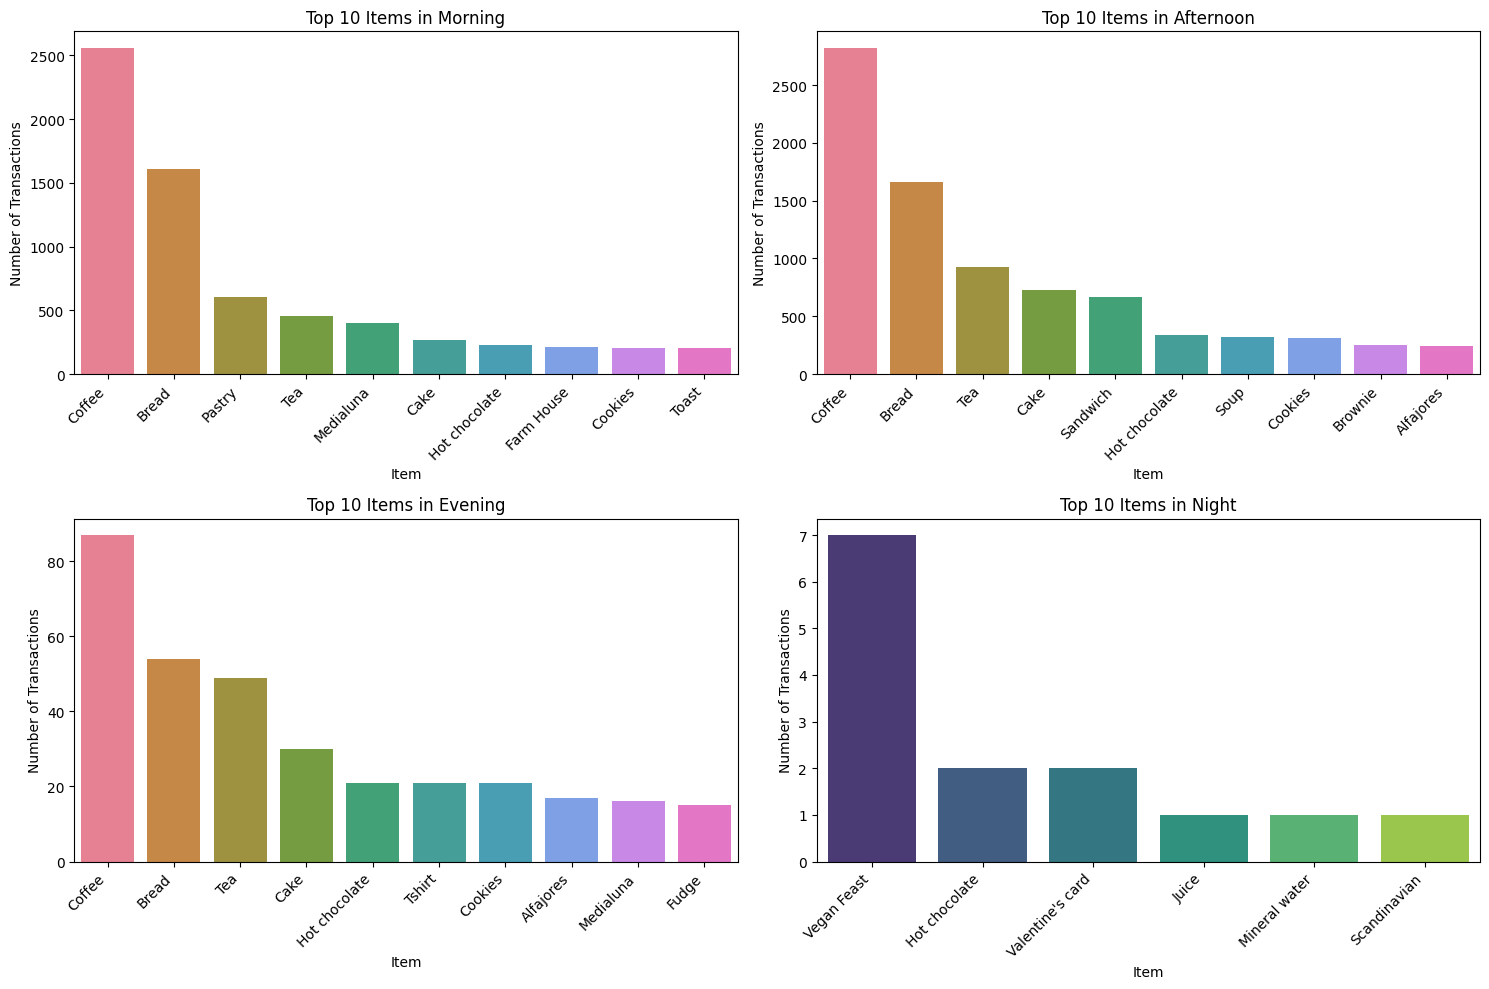

In [31]:
plt.figure(figsize=(15, 10))
sns.set_palette('viridis')

period_order = ['morning', 'afternoon', 'evening', 'night']

for i, period in enumerate(period_order):
    plt.subplot(2, 2, i + 1)
    period_items = df[df['period_day'] == period]['Item'].value_counts().head(10)
    sns.barplot(x=period_items.index, y=period_items.values, hue=period_items.index, legend=False)
    plt.title(f'Top 10 Items in {period.capitalize()}')
    plt.xlabel('Item')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

21. It turns out that there is something different in the plot above, the insight is customer purchasing behavior changes by time of day — mornings and afternoons are dominated by coffee and bread, evenings show much lower overall sales, and at night only a few unusual items appear with very low transaction volume, indicating minimal activity and different purchase patterns compared to daytime.



I found a valentine card, I was curious about when people bought it so I made a visualization of it

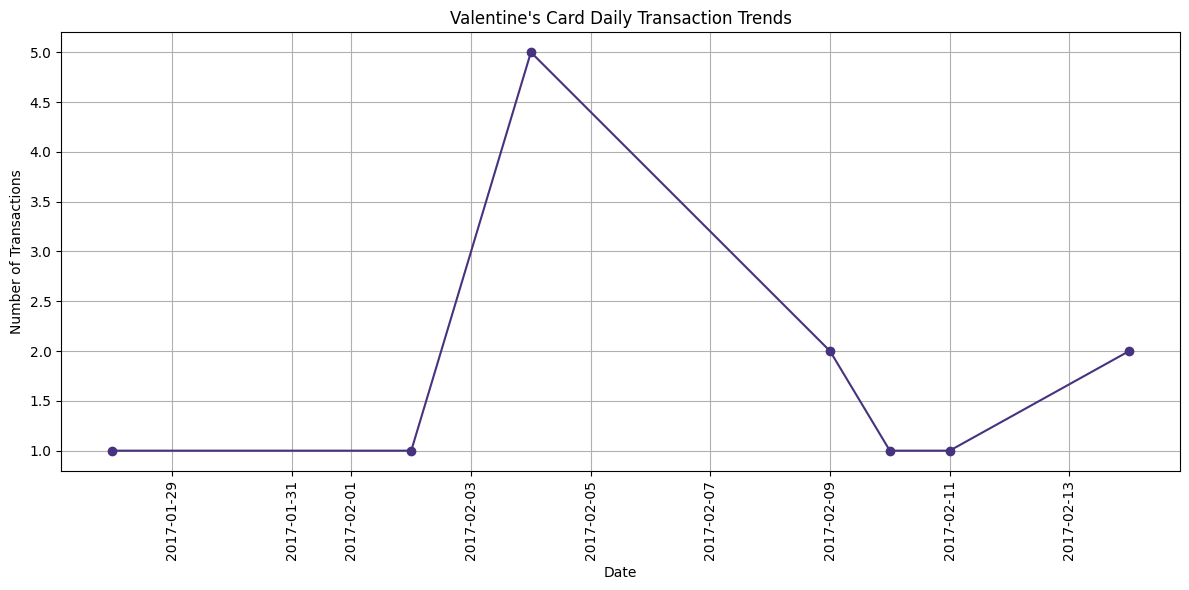

In [32]:
valentine_card_transactions = df[df['Item'] == "Valentine's card"]

# Group by date and count transactions for Valentine's card
valentine_card_daily_counts = valentine_card_transactions.groupby('date')['Transaction'].nunique()

# Plot daily transaction trends for Valentine's card
plt.figure(figsize=(12, 6))
valentine_card_daily_counts.plot(kind='line' ) # Changed to line plot and added markers
plt.title("Valentine's Card Daily Transaction Trends")
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

23. I found the insight from the sale of the Valentine's cards above is that the highest number of transactions occurred on February 4th, 2017, reaching a peak of 5 transactions.


## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [20]:
# Group items by transaction to create a list of items per transaction
basket = df.groupby(['Transaction', 'Item'])['Item'].count().unstack().fillna(0)
basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

/tmp/ipython-input-2600525122.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. Apriori: (min_support=0.02), Association Rules: (metric="lift", min_threshold=1)

In [22]:
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.12/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [23]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
5,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
18,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
19,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699,0.615122
13,(Coffee),(Medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667,0.305936
12,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
14,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
15,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.256084
11,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
10,(Coffee),(Juice),0.478394,0.038563,0.020602,0.043065,1.116750,0.002154,1.004705,0.200428


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:


ANSWER

The "Weekend Warrior" Effect: Transaction volume varies significantly by day, with Saturday emerging as the undisputed peak for business activity, followed by Sunday. Weekdays show a consistent but lower baseline of activity.

The "Lunch Rush" Critical Window: regardless of the day, the bakery experiences a predictable surge in transactions between 11:00 AM and 1:00 PM. This distinct bell curve suggests that lunch service or midday snacks are the primary revenue drivers, tapering off significantly after 4:00 PM.

Proactive Seasonal Shopping: Analysis of specific seasonal items (like Valentine's Cards) reveals that customer interest peaks well in advance of the actual holiday (specifically around February 4th), rather than at the last minute. This indicates a customer base that plans ahead.

Operational Recommendations: To maximize efficiency, staffing levels and fresh inventory production should be heavily weighted toward the Saturday midday window. Conversely, the quiet period before 8:00 AM and after 5:00 PM on weekdays offers an opportunity to reduce overhead or focus on prep work.